In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


## Veri Keşfi ve Ön İşleme

In [5]:
# Veriyi yükleyin
data = pd.read_csv("wine-clustering.csv")  

# İlk 5 gözlemi görüntüleyin
print(data.head())

# Veri çerçevesinin özet istatistiklerini alın
print(data.describe())




   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [7]:
data.info()

# Eksik verileri kontrol edin
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
Alcohol                 0
Malic_Acid              0
Ash                     0


In [8]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


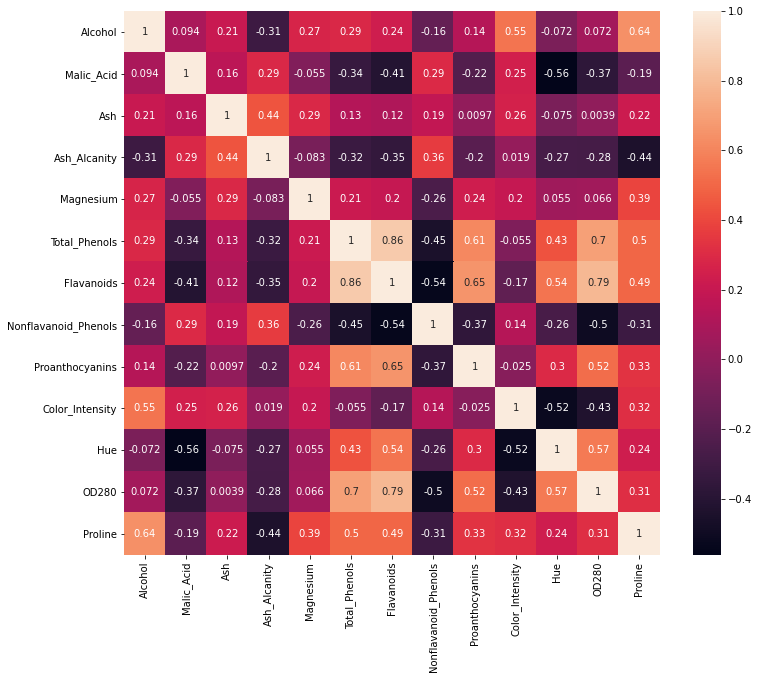

In [15]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(), annot=True)
plt.show()

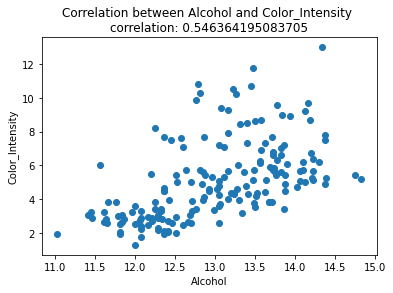

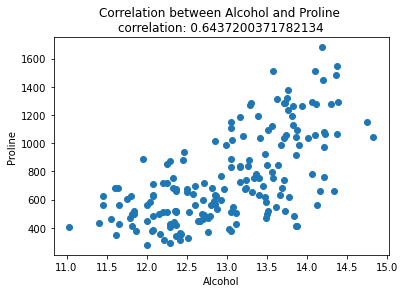

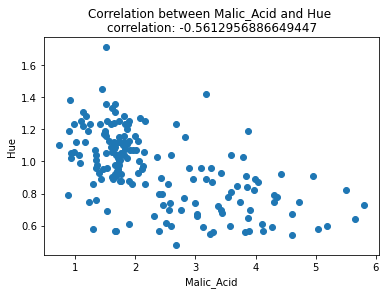

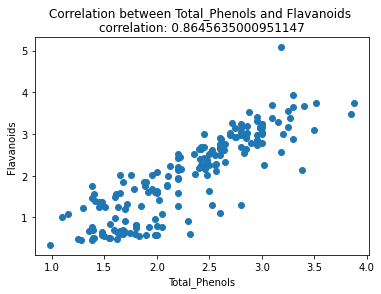

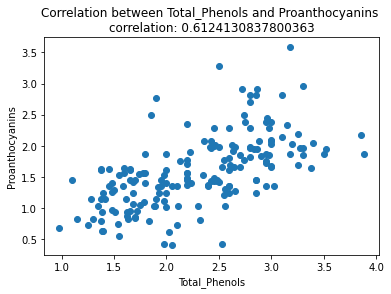

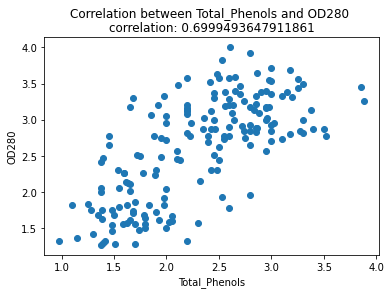

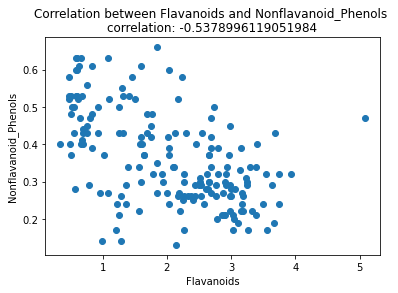

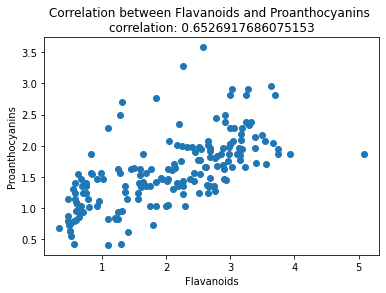

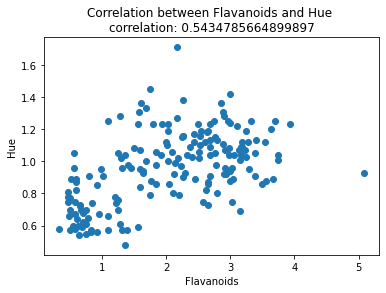

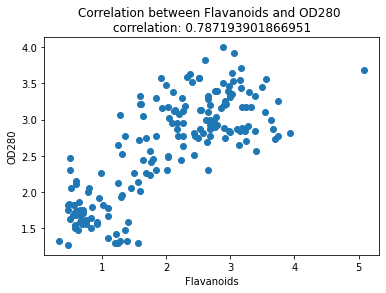

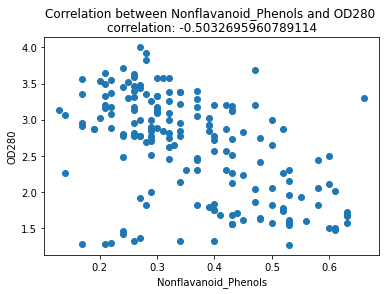

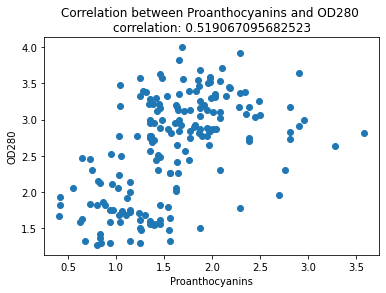

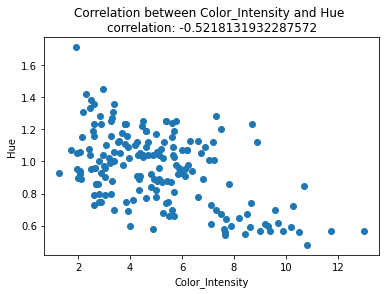

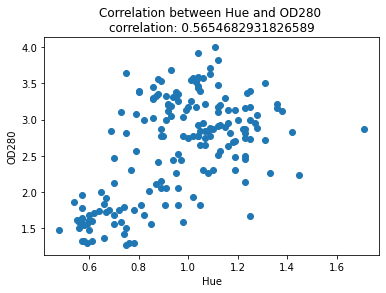

In [11]:
for i in range (len(data.columns)):
    for j in range (i+1,len(data.columns)):
        cor_coef = data.corr().iloc[i,j]
        if cor_coef>=0.5 or cor_coef<=-0.5:
            plt.scatter(data.iloc[:,i],data.iloc[:,j])
            plt.xlabel(data.columns[i])
            plt.ylabel(data.columns[j])
            plt.title(f"Correlation between {data.columns[i]} and {data.columns[j]} \ncorrelation: {cor_coef}")
            plt.show()

## Veriyi normalize etmek

In [24]:
sc = StandardScaler()
data_std = sc.fit_transform(data)
data_std = pd.DataFrame(data_std)
#归一化 MinMax
mm = MinMaxScaler()
mm_scale = mm.fit(data_std)
data_mm = mm_scale.transform(data_std)
print("feature scaling:",pd.DataFrame(data_mm).head())

feature scaling:          0         1         2         3         4         5         6   \
0  0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1  0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2  0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3  0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4  0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   

         7         8         9         10        11        12  
0  0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1  0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2  0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3  0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4  0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  


## K-Means Kümeleme

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


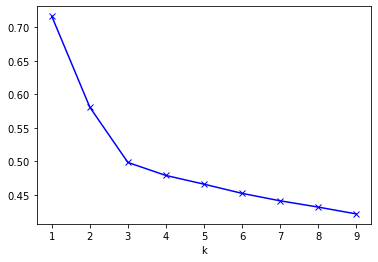

In [30]:
from scipy.spatial.distance import cdist

meandistortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans .fit(data_mm)
    meandistortions.append(
        sum(
            np.min(cdist(data_mm,kmeans.cluster_centers_,'euclidean'),axis = 1)
        )/data_mm.shape[0]
    )
plt.plot(range(1,10),meandistortions,'bx-')
plt.xlabel('k')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, random_state=20,init="k-means++").fit(data_cluster)
kmeans_labels = kmeans.fit_predict(data_cluster)

centers = kmeans.cluster_centers_
labels = kmeans_labels

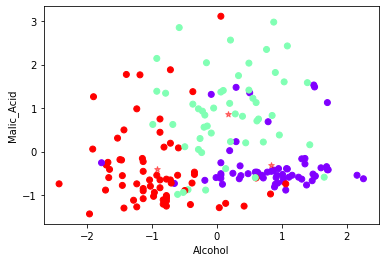

In [43]:
plt.scatter(data_cluster.iloc[:,0],data_cluster.iloc[:,1],c=labels,cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='red', marker='*',alpha=0.5)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

## DBSCAN

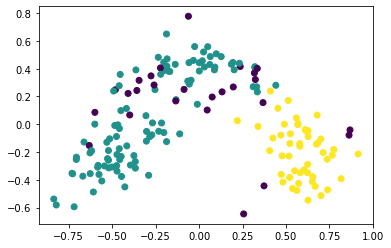

In [49]:
from sklearn.cluster import DBSCAN
pca = PCA(n_components = 0.95)
pca.fit(data_mm)
data_PCA = pca.transform(data_mm)
dbscan = DBSCAN(eps = 0.45,min_samples=3) 
label_dbs = dbscan.fit_predict(data_PCA)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_dbs)
plt.show()